In [5]:
import pandas as pd
import datetime
import numpy as np

## Loading Production Data from 1987 to 2008

The production data from these years follows the same file format.

We can therefore import using the same format and put the dataframes into a dictionary.

In 1990 we manually fix well API No: 21451, DUCKETT "A" and set it's well number to 1 as unspecified.
Same in 1991.

In [67]:
dates_cols_oil = ["OIL."+str(i) for i in range(0, 12, 1)]
dates_cols_gas = ["GAS."+str(i)  for i in range(0, 12, 1)]
dates_cols = dates_cols_oil + dates_cols_gas
headers_old_2003 = ['API_COUNTY', 'API_NUMBER', 'SUFFIX', 'WELL_NAME','WELL_NO', '  OPER_NO', 'OPER_SUFFIX',
       'OPERATOR', 'ME', 'SECTION', 'TWP','RAN', 'Q4', 'Q3', 'Q2', 'Q1', 'LATITUDE', 'LONGITUDE', 'OTC_COUNTY',
           'OTC_LEASE_NO', 'OTC_SUB_NO', 'OTC_MERGE', 'POOL_NO', 'CODE','FORMATION', 'OFB', 'ALLOWABLE_CLASS',
       'ALLOWABLE_TYPE', ' PURCH_NO',
       'PURCHASER', 'PURCH_SUFFIX', 'OFB.1',
       'YEAR', 'JAN', 'OIL.0', 'GAS.0', 'FEB',
       'OIL.1', 'GAS.1', 'MAR', 'OIL.2', 'GAS.2',
       'APR', 'OIL.3', 'GAS.3', 'MAY', 'OIL.4',
       'GAS.4', 'JUN', 'OIL.5', 'GAS.5', 'JUL',
       'OIL.6', 'GAS.6', 'AUG', 'OIL.7', 'GAS.7',
       'SEP', 'OIL.8', 'GAS.8', 'OCT', 'OIL.9',
       'GAS.9', 'NOV', 'OIL.10', 'GAS.10', 'DEC',
       'OIL.11', 'GAS.11']
headers_new_2004 = ['API_COUNTY', 'API_NUMBER', 'S', 'WELL_NAME','WELL_NO', '  OPER_NO',
       'OPERATOR', 'ME', 'SECTION', 'TWP','RAN', 'Q4', 'Q3', 'Q2', 'Q1', 'LATITUDE', 'LONGITUDE', 'OTC_COUNTY',
           'OTC_LEASE_NO', 'OTC_SUB_NO', 'OTC_MERGE', 'POOL_NO', 'CODE','FORMATION','ALLOWABLE_CLASS',
       'ALLOWABLE_TYPE', ' PURCH_NO',
       'PURCHASER', 'OFB.1',
       'YEAR', 'JAN', 'OIL.0', 'GAS.0', 'FEB',
       'OIL.1', 'GAS.1', 'MAR', 'OIL.2', 'GAS.2',
       'APR', 'OIL.3', 'GAS.3', 'MAY', 'OIL.4',
       'GAS.4', 'JUN', 'OIL.5', 'GAS.5', 'JUL',
       'OIL.6', 'GAS.6', 'AUG', 'OIL.7', 'GAS.7',
       'SEP', 'OIL.8', 'GAS.8', 'OCT', 'OIL.9',
       'GAS.9', 'NOV', 'OIL.10', 'GAS.10', 'DEC',
       'OIL.11', 'GAS.11']
df_in = None
production_data = {}
for i in range(1987, 2016, 1):
    dates_oil = [ "OIL_"+str(datetime.date(i, j+1, 1)) for j in range(0, 12, 1)]
    dates_gas = [ "GAS_"+str(datetime.date(i, j+1, 1)) for j in range(0, 12, 1)]
    renamed_oil = {old: new for old, new in zip(dates_cols_oil, dates_oil)}
    renamed_gas = {old: new for old, new in zip(dates_cols_gas, dates_gas)}
    renamed_cols = {**renamed_oil, **renamed_gas}
    #print(renamed_cols)
    if i != 1994: #No Data from 1994
        print(i)
        if i <= 2008:
            df = None
            if i < 2004:
                df = pd.read_csv("../raw/"+str(i)+"prodn.txt", delimiter="|", skiprows=[0, 2], names=headers_old_2003)
            else:
                df = pd.read_csv("../raw/"+str(i)+"prodn.txt", delimiter="|", skiprows=[0, 2], names=headers_new_2004)
            df_in = df.copy()
            print(df.columns)
            print(renamed_cols)
            df.rename(index=str, columns=renamed_cols, inplace=True)
            df = df.drop(['YEAR','JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL','AUG', 'SEP', 'OCT', 'NOV', 'DEC'], axis=1)
            production_data[i] = df
        else:
            df = pd.read_csv("../raw/"+str(i)+"prodn.txt", delimiter="|")
            df[["API_COUNTY", "API_NUMBER"]].apply(lambda x: pd.to_numeric(x, errors='coerce',downcast='integer'))
            df_in = df.copy()
            df.rename(renamed_cols)
            production_data[i] = df
df_in.head()

1987
Index(['API_COUNTY', 'API_NUMBER', 'SUFFIX', 'WELL_NAME', 'WELL_NO',
       '  OPER_NO', 'OPER_SUFFIX', 'OPERATOR', 'ME', 'SECTION', 'TWP', 'RAN',
       'Q4', 'Q3', 'Q2', 'Q1', 'LATITUDE', 'LONGITUDE', 'OTC_COUNTY',
       'OTC_LEASE_NO', 'OTC_SUB_NO', 'OTC_MERGE', 'POOL_NO', 'CODE',
       'FORMATION', 'OFB', 'ALLOWABLE_CLASS', 'ALLOWABLE_TYPE', ' PURCH_NO',
       'PURCHASER', 'PURCH_SUFFIX', 'OFB.1', 'YEAR', 'JAN', 'OIL.0', 'GAS.0',
       'FEB', 'OIL.1', 'GAS.1', 'MAR', 'OIL.2', 'GAS.2', 'APR', 'OIL.3',
       'GAS.3', 'MAY', 'OIL.4', 'GAS.4', 'JUN', 'OIL.5', 'GAS.5', 'JUL',
       'OIL.6', 'GAS.6', 'AUG', 'OIL.7', 'GAS.7', 'SEP', 'OIL.8', 'GAS.8',
       'OCT', 'OIL.9', 'GAS.9', 'NOV', 'OIL.10', 'GAS.10', 'DEC', 'OIL.11',
       'GAS.11'],
      dtype='object')
{'OIL.5': 'OIL_1987-06-01', 'GAS.8': 'GAS_1987-09-01', 'GAS.11': 'GAS_1987-12-01', 'OIL.6': 'OIL_1987-07-01', 'OIL.1': 'OIL_1987-02-01', 'OIL.10': 'OIL_1987-11-01', 'GAS.4': 'GAS_1987-05-01', 'OIL.11': 'OIL_1987-12-01

E:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (0,1,5,6,9,16,17,18,19,20,21,28,30,32,33,36,39,42,45,48,51,54,57,60,63,66) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Index(['API_COUNTY', 'API_NUMBER', 'SUFFIX', 'WELL_NAME', 'WELL_NO',
       '  OPER_NO', 'OPER_SUFFIX', 'OPERATOR', 'ME', 'SECTION', 'TWP', 'RAN',
       'Q4', 'Q3', 'Q2', 'Q1', 'LATITUDE', 'LONGITUDE', 'OTC_COUNTY',
       'OTC_LEASE_NO', 'OTC_SUB_NO', 'OTC_MERGE', 'POOL_NO', 'CODE',
       'FORMATION', 'OFB', 'ALLOWABLE_CLASS', 'ALLOWABLE_TYPE', ' PURCH_NO',
       'PURCHASER', 'PURCH_SUFFIX', 'OFB.1', 'YEAR', 'JAN', 'OIL.0', 'GAS.0',
       'FEB', 'OIL.1', 'GAS.1', 'MAR', 'OIL.2', 'GAS.2', 'APR', 'OIL.3',
       'GAS.3', 'MAY', 'OIL.4', 'GAS.4', 'JUN', 'OIL.5', 'GAS.5', 'JUL',
       'OIL.6', 'GAS.6', 'AUG', 'OIL.7', 'GAS.7', 'SEP', 'OIL.8', 'GAS.8',
       'OCT', 'OIL.9', 'GAS.9', 'NOV', 'OIL.10', 'GAS.10', 'DEC', 'OIL.11',
       'GAS.11'],
      dtype='object')
{'OIL.5': 'OIL_1989-06-01', 'GAS.8': 'GAS_1989-09-01', 'GAS.11': 'GAS_1989-12-01', 'OIL.6': 'OIL_1989-07-01', 'OIL.1': 'OIL_1989-02-01', 'OIL.10': 'OIL_1989-11-01', 'GAS.4': 'GAS_1989-05-01', 'OIL.11': 'OIL_1989-12-01', 'G

E:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (0,1,5,8,15,16,17,18,19,20,27,29,30,33,36,39) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Index(['API_COUNTY', 'API_NUMBER', 'S', 'WELL_NAME', 'WELL_NO', '  OPER_NO',
       'OPERATOR', 'ME', 'SECTION', 'TWP', 'RAN', 'Q4', 'Q3', 'Q2', 'Q1',
       'LATITUDE', 'LONGITUDE', 'OTC_COUNTY', 'OTC_LEASE_NO', 'OTC_SUB_NO',
       'OTC_MERGE', 'POOL_NO', 'CODE', 'FORMATION', 'ALLOWABLE_CLASS',
       'ALLOWABLE_TYPE', ' PURCH_NO', 'PURCHASER', 'OFB.1', 'YEAR', 'JAN',
       'OIL.0', 'GAS.0', 'FEB', 'OIL.1', 'GAS.1', 'MAR', 'OIL.2', 'GAS.2',
       'APR', 'OIL.3', 'GAS.3', 'MAY', 'OIL.4', 'GAS.4', 'JUN', 'OIL.5',
       'GAS.5', 'JUL', 'OIL.6', 'GAS.6', 'AUG', 'OIL.7', 'GAS.7', 'SEP',
       'OIL.8', 'GAS.8', 'OCT', 'OIL.9', 'GAS.9', 'NOV', 'OIL.10', 'GAS.10',
       'DEC', 'OIL.11', 'GAS.11'],
      dtype='object')
{'OIL.5': 'OIL_2004-06-01', 'GAS.8': 'GAS_2004-09-01', 'GAS.11': 'GAS_2004-12-01', 'OIL.6': 'OIL_2004-07-01', 'OIL.1': 'OIL_2004-02-01', 'OIL.10': 'OIL_2004-11-01', 'GAS.4': 'GAS_2004-05-01', 'OIL.11': 'OIL_2004-12-01', 'GAS.5': 'GAS_2004-06-01', 'OIL.9': 'OIL_2004-10-01'

E:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (0,1,5,8,15,16,17,18,19,20,27,29,30) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Index(['API_COUNTY', 'API_NUMBER', 'S', 'WELL_NAME', 'WELL_NO', '  OPER_NO',
       'OPERATOR', 'ME', 'SECTION', 'TWP', 'RAN', 'Q4', 'Q3', 'Q2', 'Q1',
       'LATITUDE', 'LONGITUDE', 'OTC_COUNTY', 'OTC_LEASE_NO', 'OTC_SUB_NO',
       'OTC_MERGE', 'POOL_NO', 'CODE', 'FORMATION', 'ALLOWABLE_CLASS',
       'ALLOWABLE_TYPE', ' PURCH_NO', 'PURCHASER', 'OFB.1', 'YEAR', 'JAN',
       'OIL.0', 'GAS.0', 'FEB', 'OIL.1', 'GAS.1', 'MAR', 'OIL.2', 'GAS.2',
       'APR', 'OIL.3', 'GAS.3', 'MAY', 'OIL.4', 'GAS.4', 'JUN', 'OIL.5',
       'GAS.5', 'JUL', 'OIL.6', 'GAS.6', 'AUG', 'OIL.7', 'GAS.7', 'SEP',
       'OIL.8', 'GAS.8', 'OCT', 'OIL.9', 'GAS.9', 'NOV', 'OIL.10', 'GAS.10',
       'DEC', 'OIL.11', 'GAS.11'],
      dtype='object')
{'OIL.5': 'OIL_2005-06-01', 'GAS.8': 'GAS_2005-09-01', 'GAS.11': 'GAS_2005-12-01', 'OIL.6': 'OIL_2005-07-01', 'OIL.1': 'OIL_2005-02-01', 'OIL.10': 'OIL_2005-11-01', 'GAS.4': 'GAS_2005-05-01', 'OIL.11': 'OIL_2005-12-01', 'GAS.5': 'GAS_2005-06-01', 'OIL.9': 'OIL_2005-10-01'

E:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (0,1,5,8,15,16,17,18,19,20,27,29,30,33,36) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Index(['API_COUNTY', 'API_NUMBER', 'S', 'WELL_NAME', 'WELL_NO', '  OPER_NO',
       'OPERATOR', 'ME', 'SECTION', 'TWP', 'RAN', 'Q4', 'Q3', 'Q2', 'Q1',
       'LATITUDE', 'LONGITUDE', 'OTC_COUNTY', 'OTC_LEASE_NO', 'OTC_SUB_NO',
       'OTC_MERGE', 'POOL_NO', 'CODE', 'FORMATION', 'ALLOWABLE_CLASS',
       'ALLOWABLE_TYPE', ' PURCH_NO', 'PURCHASER', 'OFB.1', 'YEAR', 'JAN',
       'OIL.0', 'GAS.0', 'FEB', 'OIL.1', 'GAS.1', 'MAR', 'OIL.2', 'GAS.2',
       'APR', 'OIL.3', 'GAS.3', 'MAY', 'OIL.4', 'GAS.4', 'JUN', 'OIL.5',
       'GAS.5', 'JUL', 'OIL.6', 'GAS.6', 'AUG', 'OIL.7', 'GAS.7', 'SEP',
       'OIL.8', 'GAS.8', 'OCT', 'OIL.9', 'GAS.9', 'NOV', 'OIL.10', 'GAS.10',
       'DEC', 'OIL.11', 'GAS.11'],
      dtype='object')
{'OIL.5': 'OIL_2007-06-01', 'GAS.8': 'GAS_2007-09-01', 'GAS.11': 'GAS_2007-12-01', 'OIL.6': 'OIL_2007-07-01', 'OIL.1': 'OIL_2007-02-01', 'OIL.10': 'OIL_2007-11-01', 'GAS.4': 'GAS_2007-05-01', 'OIL.11': 'OIL_2007-12-01', 'GAS.5': 'GAS_2007-06-01', 'OIL.9': 'OIL_2007-10-01'

,API_COUNTY,API_NUMBER,S,WELL_NAME,WELL_NO,OPER_NO,OPERATOR,ME,SECTION,TWP,...,GAS.8,OCT,OIL.9,GAS.9,NOV,OIL.10,GAS.10,DEC,OIL.11,GAS.11
0,3,1,NaN,KIRCHER,1,4030,CHAMPLIN EXPLORATION INC,INDIAN,4,27N,...,NaN,10,NaN,NaN,11,NaN,NaN,12,NaN,NaN
1,3,25,NaN,HAGUE,1,19694,BVD INC,Indian,22,27N,...,31.0,10,NaN,39.0,11,NaN,37.0,12,NaN,45.0
2,3,68,NaN,"ADAMS ""A""",1-3,17441,CHESAPEAKE OPERATING LLC,Indian,3,25N,...,0.0,10,NaN,0.0,11,NaN,0.0,12,NaN,NaN
3,3,71,NaN,NEWLIN,1,7775,COMBINED RESOURCES CORPORATION,Indian,19,25N,...,1089.0,10,NaN,1089.0,11,NaN,873.0,12,NaN,512.0
4,3,73,NaN,WOODWARD (VOSS),1,11739,MACK ENERGY CO,Indian,25,24N,...,608.0,10,NaN,468.0,11,NaN,344.0,12,NaN,857.0


In [75]:
#for year in production_data.keys():
production_data[2009].head()

,API_COUNTY,API_NUMBER,S,WELL_NAME,WELL_NO,OPER_NO,OPERATOR,ME,SECTION,TWP,...,GAS.8,OCT,OIL.9,GAS.9,NOV,OIL.10,GAS.10,DEC,OIL.11,GAS.11
0,3,1,NaN,KIRCHER,1,4030,CHAMPLIN EXPLORATION INC,INDIAN,4,27N,...,1033.0,10,NaN,931.0,11,NaN,993.0,12,NaN,1264.0
1,3,25,NaN,HAGUE,1,19694,BVD INC,INDIAN,22,27N,...,54.0,10,NaN,40.0,11,NaN,42.0,12,NaN,31.0
2,3,71,NaN,NEWLIN,1,7775,COMBINED RESOURCES CORPORATION,INDIAN,19,25N,...,1949.0,10,NaN,2160.0,11,NaN,1912.0,12,NaN,1928.0
3,3,72,NaN,TAYLOR-HEATH,1,20259,LMS PETROLEUM L C,INDIAN,2,26N,...,1022.0,10,NaN,925.0,11,NaN,1026.0,12,NaN,859.0
4,3,73,NaN,WOODWARD (VOSS),1,11739,MACK ENERGY CO,INDIAN,25,24N,...,558.0,10,NaN,479.0,11,NaN,507.0,12,NaN,527.0


In [70]:
def filter_data(row):
    buffer = []
    for val in row:
        val_parsed = None
        try:
            val_parsed = int(val)
        except ValueError:
            val_parsed = 0
        buffer.append(val_parsed)
    return np.array(buffer, dtype=np.int32)

In [79]:
oil_dataframe = None
oil_prod_dfs = []
for year in range(1987, 2016):
    print(year)
    if year != 1994:
        oil_data = {}
        filter_col = [col for col in list(production_data[year]) if col.startswith('OIL')]
        print(len(production_data[year].index))
        yearly_prod_data = production_data[year]#.dropna()
        #print(yearly_prod_data)
        for i in range(1, len(yearly_prod_data.index)):
            row = yearly_prod_data.iloc[[i]]
            api_num = row["API_NUMBER"].values.astype(np.int32)[0]
            pdata = filter_data(row[filter_col].values[0])
            oil_data[api_num] = pdata
        months = pd.date_range(start=str(year)+'-01-01', periods=12, freq='M')
        oil_dataframe = pd.DataFrame.from_dict(oil_data)
        oil_dataframe = oil_dataframe.set_index(months) 
        oil_prod_dfs.append(oil_dataframe)
oil_dataframe.head()

1987
4049
1988
7317
1989
19190
1990
21534
1991
22713
1992
18707
1993
12926
1994
1995
25897
1996
25388
1997
26526
1998
31044
1999
34437
2000
43278
2001
34327
2002
33797
2003
37902
2004
39950
2005
38773
2006
48907
2007
44750
2008
46495
2009
42947
2010
51822
2011
41720
2012
35618
2013
41599
2014
41495
2015
41192


,1,2,3,4,5,6,8,9,10,11,...,60118,60119,60120,60123,60124,60125,60133,60142,60143,76639
2015-01-31,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2015-02-28,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2015-03-31,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2015-04-30,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2015-05-31,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [80]:
oil_all_df = pd.concat(oil_prod_dfs).fillna(0)

In [81]:
oil_all_df.to_hdf('../processed/oil/oil_data.h5','table', mode="w")

In [82]:
num_elements = []
zero_elements = 0
for column in oil_all_df:
    col = oil_all_df[column]
    try:
        num = col[(col!=0) | (col != 0.0)]
        num_elements.append(len(num))
    except ValueError:
        zero_elements+=1

In [83]:
print(np.mean(num_elements), zero_elements)

1.95976226809 0


In [84]:
print(np.max(num_elements))

100


(array([  1.09770000e+04,   6.64000000e+02,   3.30000000e+02,
          1.78000000e+02,   1.07000000e+02,   6.50000000e+01,
          4.70000000e+01,   2.60000000e+01,   2.80000000e+01,
          8.00000000e+00,   2.00000000e+00,   6.00000000e+00,
          4.00000000e+00,   0.00000000e+00,   3.00000000e+00,
          2.00000000e+00,   1.00000000e+00,   2.00000000e+00,
          0.00000000e+00,   1.00000000e+00]),
 array([   0.,    5.,   10.,   15.,   20.,   25.,   30.,   35.,   40.,
          45.,   50.,   55.,   60.,   65.,   70.,   75.,   80.,   85.,
          90.,   95.,  100.]),
 <a list of 20 Patch objects>)

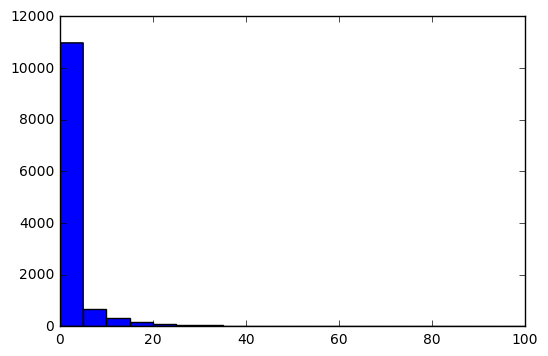

In [85]:
import matplotlib.pyplot as plt
%matplotlib inline
fig, ax = plt.subplots(1,1)
ax.hist(num_elements, bins=20)